In [1]:
import numpy as np
import os
# Imports nécessaires pour construire un modèle LeNet 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling, BatchNormalization

# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Pour la compilation du modèle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Pour visualiser les performances
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
%matplotlib inline


print(tf.__version__)
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
tf.keras.backend.clear_session()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Chargement du dataset
dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample"
#dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/train"
img_size = (224, 224)  # Taille cible
batch_size = 128
class_names = sorted(os.listdir(dir_name))
nb_class = len(class_names)

print(class_names)

train_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)

# Ajout d'optimisation : mise en cache et préchargement
#train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Méthode d'analyse des résultats
def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()

2025-03-17 20:21:51.849311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742239312.006609     984 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742239312.058327     984 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742239312.420784     984 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742239312.420801     984 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742239312.420802     984 computation_placer.cc:177] computation placer alr

2.19.0
Num GPUs Available:  1
['10', '40', '50']
Found 6851 files belonging to 3 classes.
Using 5481 files for training.


I0000 00:00:1742239326.556856     984 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 6851 files belonging to 3 classes.
Using 1370 files for validation.


## Définition des couches partagées

In [2]:
def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()






## modèle MobileNetV2

Epoch 1/30


I0000 00:00:1742239405.076054    1221 cuda_dnn.cc:529] Loaded cuDNN version 90800


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.4343 - loss: 1.2799 

2025-03-17 20:23:37.963331: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2025-03-17 20:23:36.879316: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 4294967296
2025-03-17 20:23:36.879396: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 3865470464
2025-03-17 20:23:36.879408: W external/local_xla/xla/stream_executor/integrations/stream_executor_allocator.cc:50] could not allocate pinned host memory of size: 3478923264


43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 437ms/step - accuracy: 0.4360 - loss: 1.2764 - val_accuracy: 0.6927 - val_loss: 0.7287 - learning_rate: 1.0000e-04
Epoch 2/30


2025-03-17 20:23:45.540998: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6219 - loss: 0.8610

2025-03-17 20:23:53.469566: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.6223 - loss: 0.8602 - val_accuracy: 0.7409 - val_loss: 0.6446 - learning_rate: 1.0000e-04
Epoch 3/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.7344 - loss: 0.6507

2025-03-17 20:23:55.215514: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6896 - loss: 0.7244

2025-03-17 20:24:02.549567: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.6896 - loss: 0.7245 - val_accuracy: 0.7460 - val_loss: 0.6118 - learning_rate: 1.0000e-04
Epoch 4/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.7422 - loss: 0.6223

2025-03-17 20:24:04.247352: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7194 - loss: 0.6822

2025-03-17 20:24:09.615540: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.7194 - loss: 0.6821 - val_accuracy: 0.7562 - val_loss: 0.5890 - learning_rate: 1.0000e-04
Epoch 5/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.7188 - loss: 0.6760

2025-03-17 20:24:11.259977: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7249 - loss: 0.6730

2025-03-17 20:24:18.513041: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7249 - loss: 0.6729 - val_accuracy: 0.7628 - val_loss: 0.5796 - learning_rate: 1.0000e-04
Epoch 6/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.7656 - loss: 0.5892

2025-03-17 20:24:20.192074: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7408 - loss: 0.6378

2025-03-17 20:24:27.540547: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.7407 - loss: 0.6379 - val_accuracy: 0.7752 - val_loss: 0.5662 - learning_rate: 1.0000e-04
Epoch 7/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.7656 - loss: 0.5434

2025-03-17 20:24:29.246814: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7435 - loss: 0.6152

2025-03-17 20:24:36.405062: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.7436 - loss: 0.6151 - val_accuracy: 0.7759 - val_loss: 0.5558 - learning_rate: 1.0000e-04
Epoch 8/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8438 - loss: 0.5155

2025-03-17 20:24:38.087317: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7587 - loss: 0.6080

2025-03-17 20:24:43.142505: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.7585 - loss: 0.6084 - val_accuracy: 0.7715 - val_loss: 0.5570 - learning_rate: 1.0000e-04
Epoch 9/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.8047 - loss: 0.5182

2025-03-17 20:24:44.750038: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7578 - loss: 0.6075

2025-03-17 20:24:52.079662: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.7577 - loss: 0.6074 - val_accuracy: 0.7766 - val_loss: 0.5488 - learning_rate: 1.0000e-04
Epoch 10/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.7812 - loss: 0.5668

2025-03-17 20:24:53.774199: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7629 - loss: 0.5906

2025-03-17 20:25:01.119420: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.7629 - loss: 0.5905 - val_accuracy: 0.7759 - val_loss: 0.5427 - learning_rate: 1.0000e-04
Epoch 11/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.7969 - loss: 0.4852

2025-03-17 20:25:02.841652: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.7685 - loss: 0.5687

2025-03-17 20:25:07.918687: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.7681 - loss: 0.5695 - val_accuracy: 0.7708 - val_loss: 0.5440 - learning_rate: 1.0000e-04
Epoch 12/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8203 - loss: 0.4809

2025-03-17 20:25:09.612919: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7698 - loss: 0.5729

2025-03-17 20:25:16.645851: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.7698 - loss: 0.5729 - val_accuracy: 0.7788 - val_loss: 0.5355 - learning_rate: 1.0000e-04
Epoch 13/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.8047 - loss: 0.5319

2025-03-17 20:25:18.344957: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7611 - loss: 0.5833

2025-03-17 20:25:25.690450: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.7611 - loss: 0.5833 - val_accuracy: 0.7818 - val_loss: 0.5363 - learning_rate: 1.0000e-04
Epoch 14/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.8047 - loss: 0.4956

2025-03-17 20:25:27.406110: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7742 - loss: 0.5613

2025-03-17 20:25:34.775600: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.7741 - loss: 0.5614 - val_accuracy: 0.7861 - val_loss: 0.5286 - learning_rate: 5.0000e-05
Epoch 15/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.7734 - loss: 0.5150

2025-03-17 20:25:36.474134: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7658 - loss: 0.5557

2025-03-17 20:25:41.356577: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.7658 - loss: 0.5558 - val_accuracy: 0.7832 - val_loss: 0.5293 - learning_rate: 5.0000e-05
Epoch 16/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.8516 - loss: 0.4472

2025-03-17 20:25:43.054535: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7713 - loss: 0.5642

2025-03-17 20:25:50.293145: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7712 - loss: 0.5642 - val_accuracy: 0.7839 - val_loss: 0.5230 - learning_rate: 5.0000e-05
Epoch 17/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8672 - loss: 0.4266

2025-03-17 20:25:52.019679: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7793 - loss: 0.5415

2025-03-17 20:25:59.247062: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.7793 - loss: 0.5416 - val_accuracy: 0.7796 - val_loss: 0.5266 - learning_rate: 5.0000e-05
Epoch 18/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.8516 - loss: 0.4525

2025-03-17 20:26:00.944475: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7845 - loss: 0.5408

2025-03-17 20:26:08.169676: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.7844 - loss: 0.5409 - val_accuracy: 0.7825 - val_loss: 0.5188 - learning_rate: 5.0000e-05
Epoch 19/30


2025-03-17 20:26:08.331129: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7747 - loss: 0.5636 

2025-03-17 20:26:16.396001: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.7747 - loss: 0.5634 - val_accuracy: 0.7854 - val_loss: 0.5193 - learning_rate: 5.0000e-05
Epoch 20/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.8281 - loss: 0.4483

2025-03-17 20:26:18.171575: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7830 - loss: 0.5317

2025-03-17 20:26:25.393512: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.7828 - loss: 0.5319 - val_accuracy: 0.7825 - val_loss: 0.5199 - learning_rate: 2.5000e-05
Epoch 21/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7812 - loss: 0.5109

2025-03-17 20:26:27.099307: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7842 - loss: 0.5331

2025-03-17 20:26:34.297226: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.7842 - loss: 0.5333 - val_accuracy: 0.7839 - val_loss: 0.5185 - learning_rate: 2.5000e-05
Epoch 22/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.8281 - loss: 0.4920

2025-03-17 20:26:35.973958: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7877 - loss: 0.5266

2025-03-17 20:26:41.224075: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.7874 - loss: 0.5271 - val_accuracy: 0.7861 - val_loss: 0.5170 - learning_rate: 2.5000e-05
Epoch 23/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8125 - loss: 0.4646

2025-03-17 20:26:42.935925: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7873 - loss: 0.5264

2025-03-17 20:26:50.145392: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.7872 - loss: 0.5266 - val_accuracy: 0.7861 - val_loss: 0.5154 - learning_rate: 2.5000e-05
Epoch 24/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.8516 - loss: 0.4611

2025-03-17 20:26:51.847906: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7803 - loss: 0.5400

2025-03-17 20:26:59.030841: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.7802 - loss: 0.5402 - val_accuracy: 0.7876 - val_loss: 0.5141 - learning_rate: 2.5000e-05
Epoch 25/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.8516 - loss: 0.4638

2025-03-17 20:27:00.685574: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7798 - loss: 0.5558

2025-03-17 20:27:07.911400: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.7796 - loss: 0.5558 - val_accuracy: 0.7854 - val_loss: 0.5153 - learning_rate: 2.5000e-05
Epoch 26/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.7969 - loss: 0.4719

2025-03-17 20:27:09.522012: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7754 - loss: 0.5492

2025-03-17 20:27:14.849301: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.7754 - loss: 0.5492 - val_accuracy: 0.7861 - val_loss: 0.5150 - learning_rate: 1.2500e-05
Epoch 27/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.8359 - loss: 0.5258

2025-03-17 20:27:16.509940: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7921 - loss: 0.5240

2025-03-17 20:27:23.740778: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.7920 - loss: 0.5242 - val_accuracy: 0.7861 - val_loss: 0.5155 - learning_rate: 1.2500e-05
Epoch 28/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.8125 - loss: 0.4888

2025-03-17 20:27:25.359529: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7722 - loss: 0.5365

2025-03-17 20:27:32.616981: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.7722 - loss: 0.5366 - val_accuracy: 0.7861 - val_loss: 0.5143 - learning_rate: 1.2500e-05
Epoch 29/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.8672 - loss: 0.4301

2025-03-17 20:27:34.195130: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7816 - loss: 0.5469

2025-03-17 20:27:39.387010: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.7814 - loss: 0.5469 - val_accuracy: 0.7854 - val_loss: 0.5145 - learning_rate: 1.2500e-05
Epoch 30/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.8281 - loss: 0.4636

2025-03-17 20:27:40.955757: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7779 - loss: 0.5300

2025-03-17 20:27:48.151013: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.7778 - loss: 0.5302 - val_accuracy: 0.7847 - val_loss: 0.5144 - learning_rate: 1.2500e-05
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8438 - loss: 0.4478

2025-03-17 20:27:49.881741: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.7950 - loss: 0.5079
Précision de validation finale: 0.7847


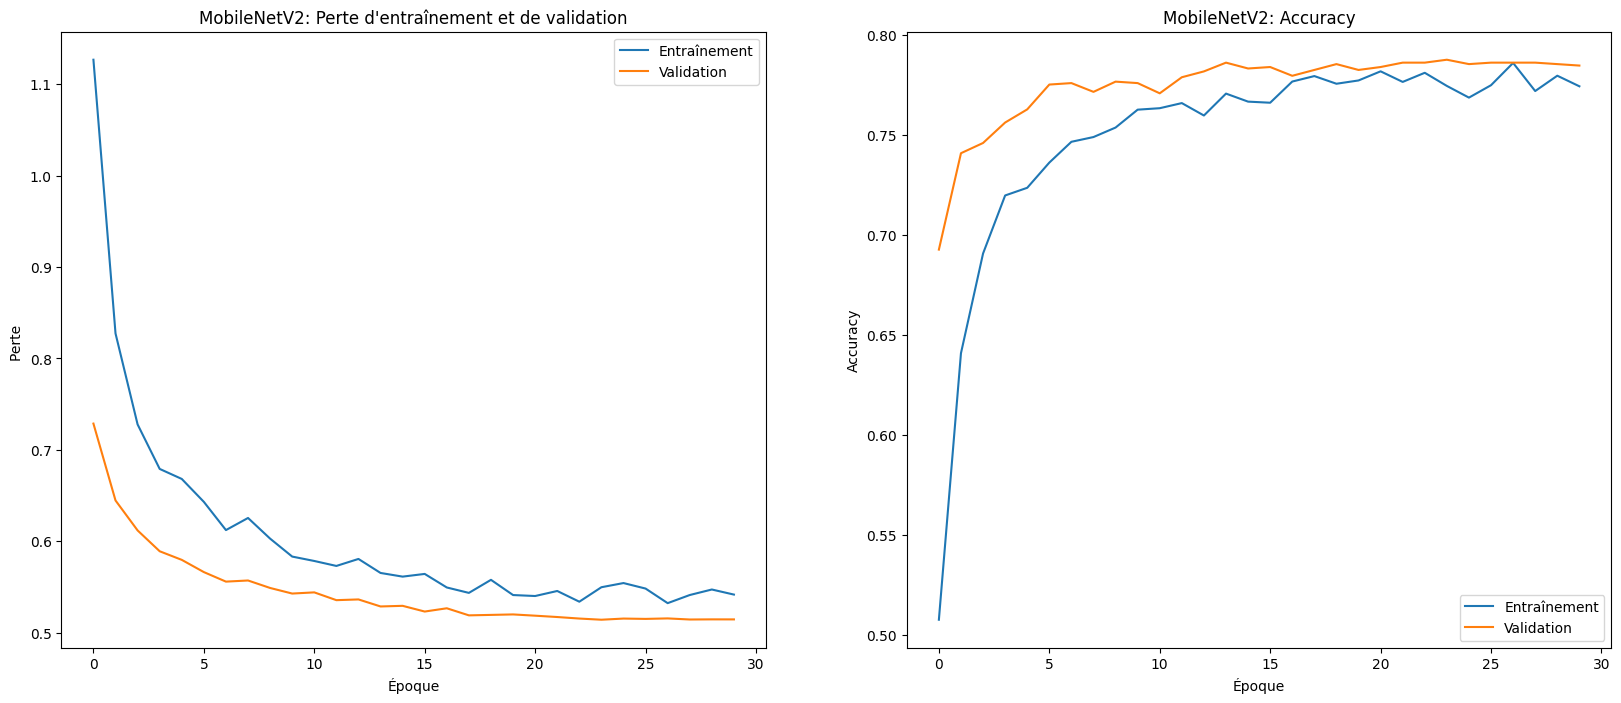

2025-03-17 20:27:53.717045: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 77070848 bytes after encountering the first element of size 77070848 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


4/4 ━━━━━━━━━━━━━━━━━━━━ 45s 211ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 715ms/step


In [ ]:
### ARCHITECTURE DU MODEL ###

import tensorflow as tf 
from tensorflow.keras.applications import MobileNetV2

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

# 1. Choisir un modèle préentraîné
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Geler d'abord le modèle de base

# 2. Construire le modèle complet
model = tf.keras.Sequential([
    # Augmentation de données
    data_augmentation,
    
    # Normalisation
    tf.keras.layers.Rescaling(1./127.5, offset=-1),  
    
    # Modèle de base
    base_model,
    
    # Couches de classification
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(nb_class, activation='softmax')
])

ReduceLR_callback = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3,
                                    min_delta=0.01,
                                    factor=0.5, 
                                    cooldown=4)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),                 
    metrics=['accuracy'])             

model_history = model.fit(train_ds,           
                           validation_data=val_ds,
                           epochs=30,
                           callbacks=[ReduceLR_callback])       


### ANALYSE DE L ENTRAINEMENT ###

val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Précision de validation finale: {val_accuracy:.4f}")
display_results(model_history, "MobileNetV2")


### ANALYSE DE LA PERFORMACE ###

# 1. Générer des prédictions sur l'ensemble de validation
# Prévoir les classes pour tous les échantillons de validation
predictions = []
labels = []

# Récupérer toutes les étiquettes et prédictions
for images, true_labels in val_ds:
    pred = model.predict(images)
    pred_classes = np.argmax(pred, axis=1)
    
    predictions.extend(pred_classes)
    labels.extend(true_labels.numpy())

# Convertir en arrays numpy
predictions = np.array(predictions)
labels = np.array(labels)

# 2. Créer et afficher la matrice de confusion
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')#, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()